
# Кейс спринта


Заказчик проекта — «Карта ДТП». Это некоммерческий проект, посвящённый проблеме дорожно-транспортных происшествий в России. Цель проекта — повысить безопасность на дорогах.

«Карта ДТП» помогает выявлять реальные причины ДТП, оценивать уровень развития инфраструктуры, а также разрабатывать качественные решения и программы по повышению безопасности на улицах и дорогах. Заказчик хочет собирать данные более высокого качества и ожидает от вас рекомендаций: на какие проблемы или особенности обратить внимание.

## Что нужно сделать

Вам необходимо проверить, встречаются ли в данных дубликаты и пропуски. Это поможет заказчикам собирать более качественные данные.

Вам также понадобится ответить на следующие вопросы:

- как менялось число ДТП по временным промежуткам;

- различается ли число ДТП для групп водителей с разным стажем.


## Описание данных

Данные `Kirovskaya_oblast.csv`, `Moscowskaya_oblast.csv` содержат информацию ДТП:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

*  `properties.tags` — тег происшествия;

*  `properties.light` — освещённость;

*  `properties.point.lat` — широта;

*  `properties.point.long` — долгота;

*  `properties.nearby` — ближайшие объекты;

*  `properties.region` — регион;

*  `properties.scheme` — схема ДТП;

*  `properties.address` — ближайший адрес;

*  `properties.weather` — погода;

*  `properties.category` — категория ДТП;

*  `properties.datetime` — дата и время ДТП;

*  `properties.injured_count` — число пострадавших;

*  `properties.parent_region` — область;

*  `properties.road_conditions` — состояние покрытия;

*  `properties.participants_count` — число участников;

*  `properties.participant_categories` — категории участников.

`Moscowskaya_oblast_participiants.csv`, `Kirovskaya_oblast_participiants.csv` — сведения об участниках ДТП:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после  ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.


`Kirovskaya_oblast_vehicles.csv`, `Moscowskaya_oblast_vehicles.csv` — сведения о транспортных средствах:

* `year` — год выпуска;

* `brand` — марка транспортного средства;

* `color` — цвет;

* `model` — модель;

* `category` — категория;

* `id` — идентификатор ДТП.

# Проверка ошибок в данных и их предобработка



In [1]:
# Устанавливаем библиотеку для работы с пропусками
!pip install missingno -q

In [2]:
# Импортируем библиотеку pandas
import pandas as pd
# Импортируем библиотеку для визуализации пропусков
import missingno as msno

In [3]:
# Загружаем необходимые датафреймы

kirov_df = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')
moscow_df = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast.csv')
kirov_partic_df = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')
moscow_partic_df = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_participiants.csv')
kirov_vehic_df = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_vehicles.csv')
moscow_vehic_df = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_vehicles.csv')

Датафреймы загружены, проведем их анализ

#### Общий обзор  датафреймов `Kirovskaya_oblast.csv`, `Moscowskaya_oblast.csv`

----

In [4]:
# Выгрузи информацию о датафрейме
kirov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               14517 non-null  object 
 1   id                                 14517 non-null  int64  
 2   properties.tags                    14517 non-null  object 
 3   properties.light                   14517 non-null  object 
 4   properties.point.lat               14485 non-null  float64
 5   properties.point.long              14485 non-null  float64
 6   properties.nearby                  14517 non-null  object 
 7   properties.region                  14517 non-null  object 
 8   properties.scheme                  13380 non-null  float64
 9   properties.address                 13843 non-null  object 
 10  properties.weather                 14517 non-null  object 
 11  properties.category                14517 non-null  obj

In [5]:
kirov_df.head()

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


* В датафрейме `Kirovskaya_oblast.csv` содержится 14 517 строк и 18 колонок. Тип данных для колонок распределен следующим образом - `float64` - 3, `int64` - 3, `object` - 12
* Для колонок `properties.tags`, `properties.light`, `properties.region`, `properties.category`, `properties.parent_region `автоматически применился тип `object`. Для оптимизации ресурсов можно преобразовать эти колонки в тип `category`.
* Для колонки `properties.datetime` применился тип `object`. Для вычислений с временными интервалами необходимо **произвести преобразование в `datetime64`**
* Для остальных колонок тип данных применился корректно

* Колонки `properties.point.lat`, `properties.point.long`, `properties.scheme`, `properties.address` содержат NaN значения

In [6]:
moscow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45618 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               45618 non-null  object 
 1   id                                 45618 non-null  int64  
 2   properties.tags                    45618 non-null  object 
 3   properties.light                   45618 non-null  object 
 4   properties.point.lat               45615 non-null  float64
 5   properties.point.long              45615 non-null  float64
 6   properties.nearby                  45618 non-null  object 
 7   properties.region                  45618 non-null  object 
 8   properties.scheme                  44235 non-null  float64
 9   properties.address                 43862 non-null  object 
 10  properties.weather                 45618 non-null  object 
 11  properties.category                45618 non-null  obj

In [7]:
moscow_df.head(3)

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.999200,37.525300,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']
1,"[37.058966, 55.788688]",2155398,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.788688,37.058966,[],Истринский,70.0,М-9 Балтия Москва - Волоколамск - граница с Ла...,['Ясно'],Столкновение,2018-09-22 05:00:00,2,Московская область,['Сухое'],4,"['Все участники', 'Дети']"
2,"[37.4419, 56.0081]",2163319,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",56.008100,37.441900,"['Многоквартирные жилые дома', 'Остановка обще...",Лобня,820.0,"г Лобня, ул Ленина, 43",['Пасмурно'],Наезд на пешехода,2019-01-24 19:30:00,1,Московская область,['Обработанное противогололедными материалами'],2,"['Все участники', 'Пешеходы']"


* В датафрейме `Moscowskaya_oblast.csv` содержится 45 628 строк и 18 колонок.
* Все остальные выводы аналогичны датафрейму `Kirovskaya_oblast.csv`

---

#### Анализ датафреймов об участниках ДТП `Kirovskaya_oblast_participiants.csv`,  `Moscowskaya_oblast_participiants.csv`

In [8]:
kirov_partic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
kirov_partic_df.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


* Датафрейм `Kirovskaya_oblast_participiants.csv` содержит 31 235 строчек и 6 колонок. Распределение типов данных следующее float64 - 1, int64 - 1, object - 4.
* Для `role` и `gender` применен тип `object`. Для оптимизации можно преобразовать в тип `category`
* Для остальных колонок применен корректный тип данных
* Колонки `gender`, `years_of_driving_experience` содержат пропуска

In [10]:
moscow_partic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95177 entries, 0 to 95176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         95177 non-null  object 
 1   gender                       93307 non-null  object 
 2   violations                   95177 non-null  object 
 3   health_status                95070 non-null  object 
 4   years_of_driving_experience  59679 non-null  float64
 5   id                           95177 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB


In [11]:
moscow_partic_df.head(3)

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,[],Не пострадал,13.0,2163589
1,Водитель,Мужской,[],Не пострадал,13.0,2163589
2,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5.0,2155398


* Датафрейм  `Moscowskaya_oblast_participiants.csv` содержит 95 177 строчек и 6 колонок.
* Колонки `gender`, `years_of_driving_experience`, `health_status` содержат пропуска
* Остальные выводы аналогичны датафрейму `Kirovskaya_oblast_participiants.csv`

---

#### Общий обзор датафреймов о Т.С.  `Kirovskaya_oblast_vehicles.csv`, `Moscowskaya_oblast_vehicles.csv`

In [12]:
kirov_vehic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19299 non-null  float64
 1   brand     19318 non-null  object 
 2   color     19643 non-null  object 
 3   model     19318 non-null  object 
 4   category  20093 non-null  object 
 5   id        20093 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 942.0+ KB


In [13]:
kirov_vehic_df.head()

,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


* В датафрейме `Kirovskaya_oblast_vehicles.csv` содержится 20 093 строки и 6 колонок.
* Все типы данных для колонок корректны
* В колонках `year`, `brand`, `color`, `model` содержатся пропуска

In [14]:
moscow_vehic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65606 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      63860 non-null  float64
 1   brand     64185 non-null  object 
 2   color     64765 non-null  object 
 3   model     64185 non-null  object 
 4   category  65606 non-null  object 
 5   id        65606 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


In [15]:
moscow_vehic_df.head(3)

,year,brand,color,model,category,id
0,2012.0,ГАЗ,Белый,Прочие модели ГАЗ,Фургоны,2163589
1,2008.0,OPEL,Черный,Astra,"С-класс (малый средний, компактный) до 4,3 м",2155398
2,2017.0,MAZDA,Черный,CX-5,"В-класс (малый) до 3,9 м",2163319


 * В датафрейме `Moscowskaya_oblast_vehicles.csv` содержится 65 606 строки и 6 колонок.
 * Все остальное аналогично датафрейму Кировской области

**Общие выводы после знакомства с данными:**
* Датафреймы для Московской и Кировской области схожи
* Для Московской области выборка данных больше. Это связано с большей площадью региона
* В датафреймах присутствуют пропуска. Колонки с пропусками аналогичны для двух датафреймов одной категории

###  1) Замена названий (меток) столбцов на оптимальные для работы

In [16]:
kirov_df.columns

Index(['geometry.coordinates', 'id', 'properties.tags', 'properties.light',
       'properties.point.lat', 'properties.point.long', 'properties.nearby',
       'properties.region', 'properties.scheme', 'properties.address',
       'properties.weather', 'properties.category', 'properties.datetime',
       'properties.injured_count', 'properties.parent_region',
       'properties.road_conditions', 'properties.participants_count',
       'properties.participant_categories'],
      dtype='object')

In [17]:
# Преобразование имен колонок в удобные для работы имена
for df in [moscow_df, kirov_df]:
    df.columns = df.columns.str.replace('properties.', '', regex=True).str.replace('.', '_', regex=True)

In [18]:
kirov_df.columns

Index(['geometry_coordinates', 'id', 'tags', 'light', 'point_lat',
       'point_long', 'nearby', 'region', 'scheme', 'address', 'weather',
       'category', 'datetime', 'injured_count', 'parent_region',
       'road_conditions', 'participants_count', 'participant_categories'],
      dtype='object')

### 2) Проверка пропусков в данных

#### Изучение пропусков на примере датасета `Kirovskaya_oblast.csv`

In [19]:
# Выводим общее кол-во пропусков
kirov_df.isna().sum()

geometry_coordinates         0
id                           0
tags                         0
light                        0
point_lat                   32
point_long                  32
nearby                       0
region                       0
scheme                    1137
address                    674
weather                      0
category                     0
datetime                     0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

In [20]:
# Выводим долю пропусков в данных
round(kirov_df.isna().mean()*100, 2)

geometry_coordinates      0.00
id                        0.00
tags                      0.00
light                     0.00
point_lat                 0.22
point_long                0.22
nearby                    0.00
region                    0.00
scheme                    7.83
address                   4.64
weather                   0.00
category                  0.00
datetime                  0.00
injured_count             0.00
parent_region             0.00
road_conditions           0.00
participants_count        0.00
participant_categories    0.00
dtype: float64

<AxesSubplot:>

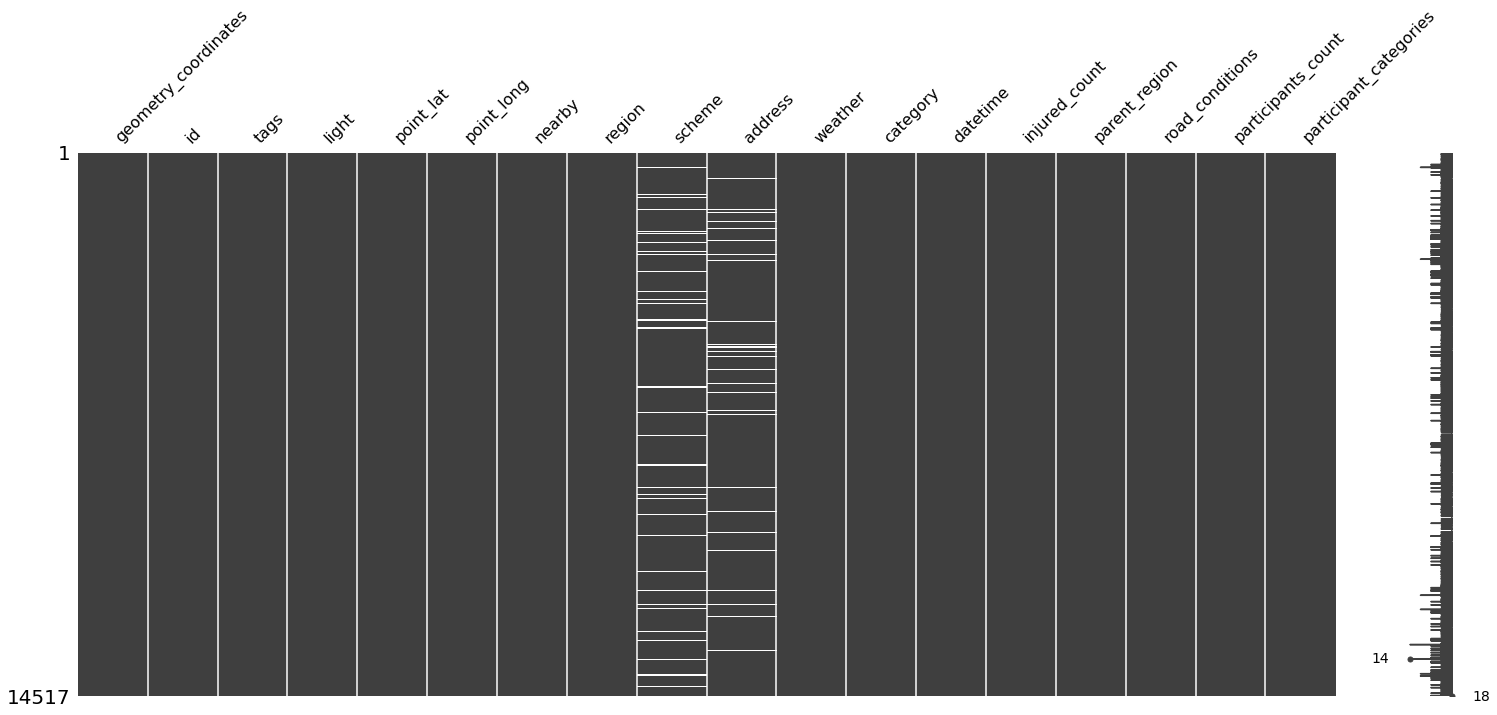

In [21]:
msno.matrix(kirov_df)

In [22]:
# Распределение пропусков по типу ДТП
kirov_df.groupby('category')['scheme'].apply(lambda x: x.isna().mean() *100).sort_values()

category
Наезд на животное                                                                                              0.000000
Столкновение                                                                                                   4.075235
Наезд на стоящее ТС                                                                                            4.487179
Падение пассажира                                                                                              6.368564
Наезд на пешехода                                                                                              7.768103
Съезд с дороги                                                                                                 8.744589
Наезд на препятствие                                                                                           9.595202
Опрокидывание                                                                                                  9.980040
Наезд на лицо, не являющееся уч

* Пропуски распределены в хаотичном порядке
* Пропуски в колонках `point_lat` и `point_long` составляют 0.22% и находятся в одинаковых строках. Скорее всего такие пропуски связаны с ошибкой занесения данных. Эти колонки нам не нужны для дальнейших расчетов, можем оставить NaN значения
* Пропуски в колонке `scheme` могут быть как технической ошибкой, так и отсутствием схемы. Cхемы частично отсутствуют в проишествиях до 6 пострадавших, полностью отсутствуют в ДТП с падением груза и в основном отсуствтуют в ДТП с отбрасыванием предмета. Можно предположить что схемы не оформлялись по причине легких повреждений без серьезных последствий или по договору двух сторон. Необходимо в дальнейшем указывать вместо NaN значений значение "Схема не оформлялась". В текущий момент оставим эти пропуска в формате NaN, данная колонка не нужна в расчетах.
* Пропуски в колонке `address` являются как ошибкой занесения данных, так и остуствием адреса. При выборочной проверке координат можно заметит что ДТП с id 2875597 было совершено в многоквартирных домах у которых присутствует адресс, а вот ДТП с id 2861063 было совершено на проселочной дороге без названия. В дальнейшем необходимо детальнее заполнять эту колонку. Если адресс отсутствует можно указать область и район. В данный момент оставим эти пропуска как NaN. Данная колонка нам не нужна.

----

#### Изучение пропусков на примере датасета `Kirovskaya_oblast_participiants.csv`

In [23]:
# Выводим кол-во пропусков в данных
kirov_partic_df.isna().sum()

role                               0
gender                           848
violations                         0
health_status                    100
years_of_driving_experience    14326
id                                 0
dtype: int64

In [24]:
# Выводим долю пропусков в данных
round(kirov_partic_df.isna().mean() * 100, 2)

role                            0.00
gender                          2.71
violations                      0.00
health_status                   0.32
years_of_driving_experience    45.87
id                              0.00
dtype: float64

In [25]:
# Выводим долю пропусков в данных для водителей
round(kirov_partic_df[kirov_partic_df['role']=='Водитель'].isna().mean() * 100, 2)

role                            0.00
gender                          3.72
violations                      0.00
health_status                   0.47
years_of_driving_experience    14.40
id                              0.00
dtype: float64

<AxesSubplot:>

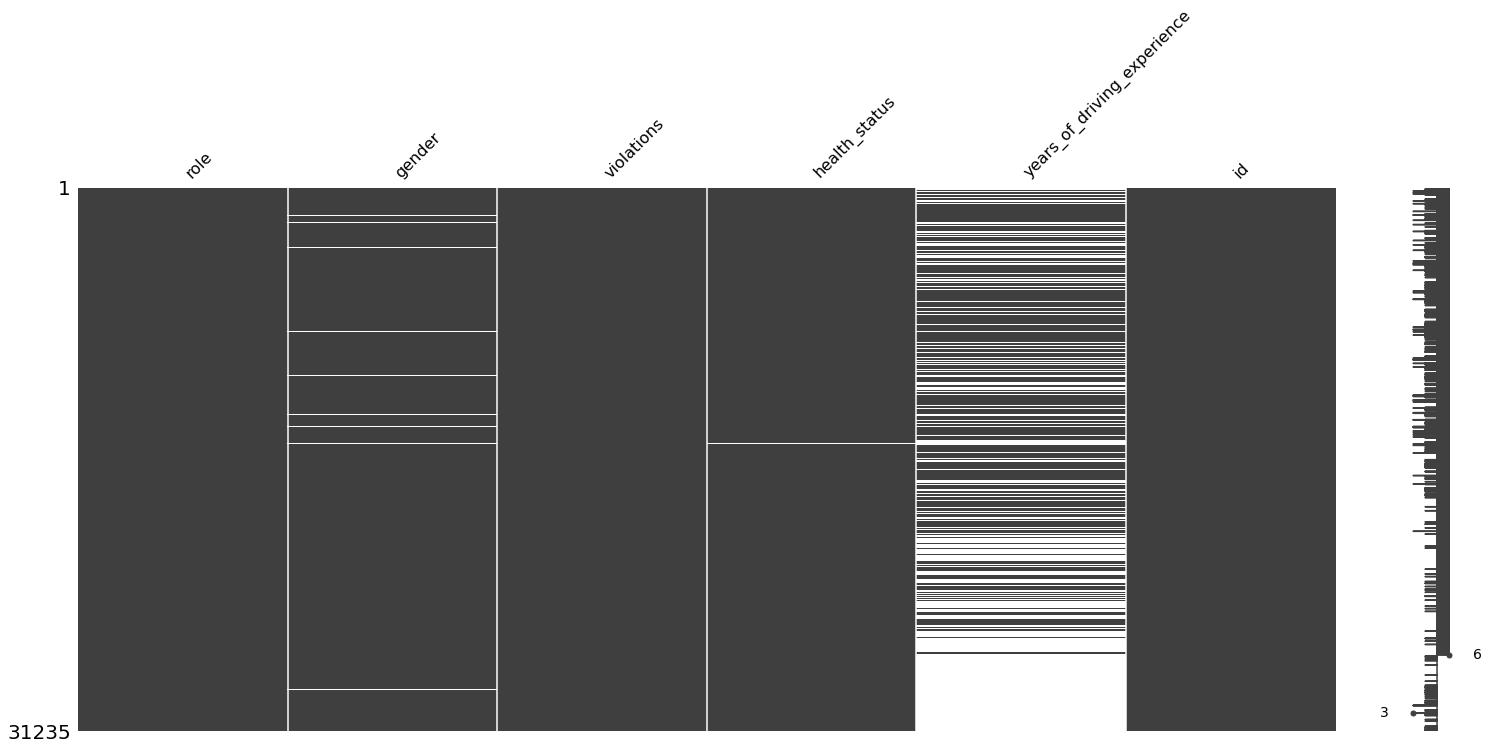

In [26]:
msno.matrix(kirov_partic_df)

Необходимо детально изучить распределение NaN значений для `years_of_driving_experience`

In [27]:
# Распределение пропусков по роли ДТП
kirov_partic_df.groupby('role')['years_of_driving_experience'].apply(lambda x: x.isna().mean() * 100).sort_values()

role
Водитель                                                                                                                             14.397813
Велосипедист                                                                                                                        100.000000
Пассажир                                                                                                                            100.000000
Пешеход                                                                                                                             100.000000
Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира    100.000000
Name: years_of_driving_experience, dtype: float64

In [28]:
# Распределение пропусков по нарушениям
kirov_partic_df.groupby('violations')['id'].apply(lambda x: x.count()).sort_values(ascending=False).head()

violations
[]                                                          13345
['Несоблюдение очередности проезда']                         1487
['Другие нарушения ПДД водителем']                           1174
['Несоответствие скорости конкретным условиям движения']      989
['Нарушение правил проезда пешеходного перехода']             926
Name: id, dtype: int64

In [29]:
# Минимальный стаж
df = kirov_partic_df[kirov_partic_df['role']=='Водитель']
df['years_of_driving_experience'].min()

1.0

In [30]:
# Кол-во ДТП в которых покинули место ДТП без указания стажа
df = kirov_partic_df[kirov_partic_df['violations'].str.contains('Оставление').groupby(level=0).any()]
df[df['years_of_driving_experience'].isna()].shape[0]

966

* Пропуски в колонке `gender` и `health_status` для водителей корелируются с пропусками в стаже вождения и связаны с нарушением "Оставление места ДТП". Предположим что установить пол и стаж вождения для таких ДТП было невозможным, в связи с отсутсвием исполнителя
* Пропуски для пешеходов в данных колонках выявлены для незначительных правонарушений. Значения в данных колонках можно заменить на Неизвестно или оставить как NaN. Эти данные нам не нужны для расчетов.
* Пропуски в колонке `years_of_driving_experience` составляют 45% всех данных. Данные пропуска частично возникли из-за оставления места ДТП. Минимальный год стажа 1. Можно предположить что NaN значения, кроме случаев оставления места ДТП для водителей - стаж менее года или у водителя отсутсвтуют права. Точных данных и возможности свзяться с заказчиком у нас нет, доля таких пропусков среди водителей 15%, так что заменим значения NaN на индикатор -1

In [31]:
# Произведем преобразование NaN в индикатор
kirov_partic_df['years_of_driving_experience'].fillna(-1, inplace=True)

In [32]:
# Произведем преобразование NaN в индикатор
moscow_partic_df['years_of_driving_experience'].fillna(-1, inplace=True)

----

#### Изучение пропусков на примере датасета `Kirovskaya_oblast_vehicles.csv`

In [33]:
# Выводим кол-во пропусков в данных
kirov_vehic_df.isna().sum()

year        794
brand       775
color       450
model       775
category      0
id            0
dtype: int64

In [34]:
# Выводим долю пропусков в данных
round(kirov_vehic_df.isna().mean() * 100, 2)

year        3.95
brand       3.86
color       2.24
model       3.86
category    0.00
id          0.00
dtype: float64

<AxesSubplot:>

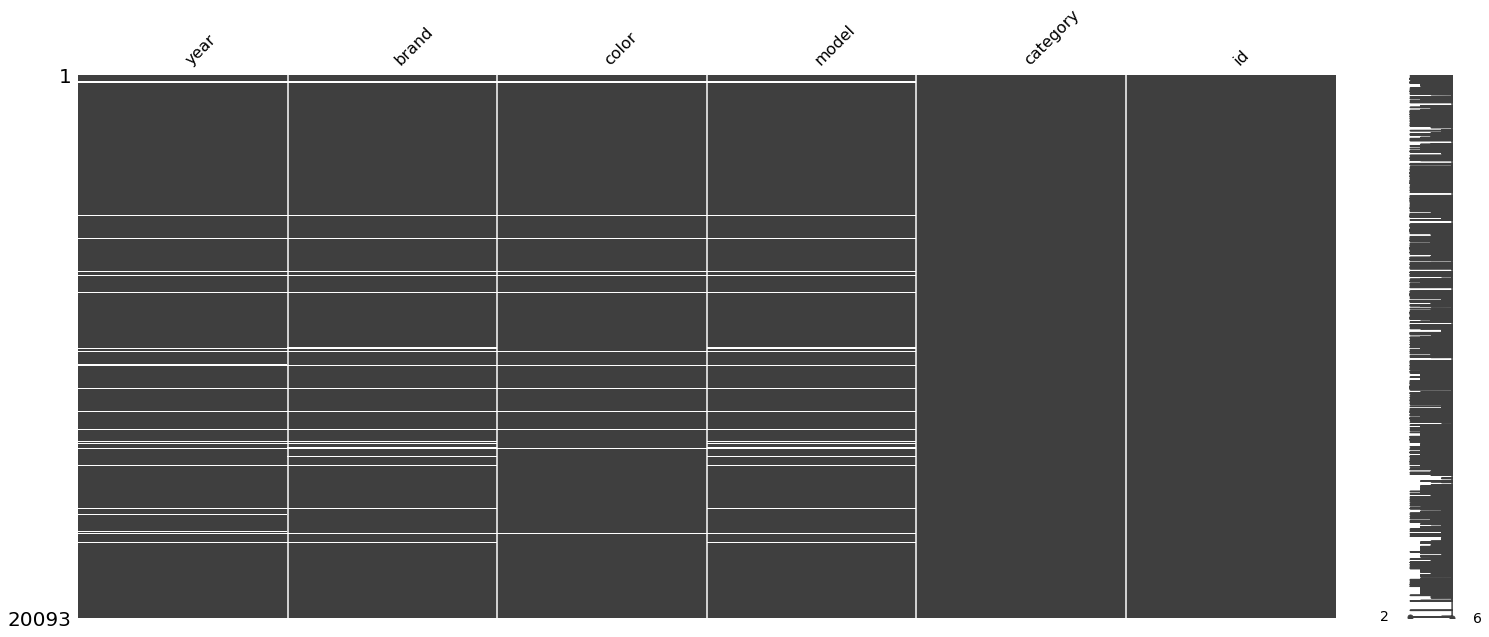

In [35]:
msno.matrix(kirov_vehic_df)

In [36]:
kirov_vehic_df.groupby('category')['brand'].apply(lambda x: x.isna().mean() * 100).sort_values(ascending=False).head(10)

category
Персональное электрическое средство передвижения малой мощности    100.000000
Подвижной состав ж/д                                                80.000000
Иные ТС                                                             57.522124
Велосипеды                                                          52.135231
Бульдозеры                                                          50.000000
Грузовые автомобили (без типа)                                      25.000000
Мопеды с электродвигателем менее 4 кВт                              24.444444
Троллейбусы                                                         23.287671
Фронтальные погрузчики                                              18.181818
Мопеды с двигателем внутреннего сгорания менее 50 см. куб.          17.037037
Name: brand, dtype: float64

* NaN значения в колонках `year`, `brand`, `color`, `model` связаны с трудным категорированием данных ТС (Поезда, велосипеды, электросамокаты и тп). Данные колонки не нужны для расчетов. Оставим NaN значения

### 3) Наличие явных и неявных дубликатов в данных



In [37]:
# проверка неявных дубликатов
kirov_df['weather'].unique()

array(["['Дождь']", "['Ясно']", "['Пасмурно']", "['Снегопад']",
       "['Снегопад', 'Метель']", "['Пасмурно', 'Дождь']", "['Туман']",
       "['Пасмурно', 'Температура ниже -30С']",
       "['Пасмурно', 'Снегопад']", "['Ясно', 'Температура выше +30С']",
       "['Пасмурно', 'Туман']", "['Метель']", "['Пасмурно', 'Метель']",
       "['Ясно', 'Температура ниже -30С']",
       "['Пасмурно', 'Ураганный ветер']", "['Ясно', 'Туман']",
       "['Дождь', 'Туман']", "['Дождь', 'Снегопад']"], dtype=object)

При проверке значений во всех колонках неявных дубликатов не было выявлено

In [38]:
# Поиск явных дубликатов
kirov_df.duplicated().sum()

0

In [39]:
# Поиск дубликатов по колонкам
kirov_df.duplicated(subset=['id', 'region', 'category']).sum()

0

В датафрейме `kirov_df` не найдено явных и неявных дубликатов

----

In [40]:
# Поиск явных дубликатов
moscow_df.duplicated().sum()

0

При проверке значений во всех колонках неявных дубликатов не было выявлено

----

In [41]:
# проверка неявных дубликатов
kirov_partic_df['role'].unique()

array(['Водитель', 'Пассажир', 'Велосипедист', 'Пешеход',
       'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира'],
      dtype=object)

In [42]:
# Проверка дубликатов во втором датафрейме
kirov_partic_df.duplicated().sum()

9727

Найдено 9 727 дубликатов. Т.к. в ДТП может быть несколько участников, нельзя утверждать, что эти строки полностью задублированы.

In [43]:
# Проверим дубликаты
df = kirov_partic_df[kirov_partic_df.duplicated()]
df.sort_values('id')

,role,gender,violations,health_status,years_of_driving_experience,id
20276,Пассажир,Женский,[],Получил телесные повреждения с показанием к ле...,-1.0,1979483
20277,Пассажир,Женский,[],Получил телесные повреждения с показанием к ле...,-1.0,1979483
569,Пассажир,Женский,[],Получил телесные повреждения с показанием к ле...,-1.0,1979483
25215,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,Не пострадал,2.0,1979483
625,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбула...",17.0,1979484
...,...,...,...,...,...,...
6440,Водитель,Мужской,['Нарушение правил проезда пешеходного перехода'],Не пострадал,26.0,3011877
6441,Водитель,Мужской,['Нарушение правил проезда пешеходного перехода'],Не пострадал,26.0,3011877
21912,Водитель,Мужской,['Светопропускание стекол менее нормативного'],"Раненый, находящийся (находившийся) на стацион...",5.0,3011879
6444,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбулат...",-1.0,3011879


In [44]:
list_partic_id = kirov_partic_df['id'].to_list()

In [45]:
kirov_df[kirov_df['id'].isin(list_partic_id)]['participants_count'].sum()

31395

In [46]:
kirov_partic_df['id'].count()

31235

Сравнение суммы потерпевших датафрейма `kirov_df` с данными о дтп из `kirov_partic_df` с суммой потерпевших датафрейма `kirov_partic_df` показали, что данные дубликаты - дублирующие строки с потерпевшими. Для избегания такой проблемы в дальнейшем можно присвоить уникальный номер для каждого потерпевшего.

### 4) Преобразование типов данных

In [47]:
# Проведем преобразования типов данных
df_list = [kirov_df, moscow_df]
column_int_names = ['id', 'participants_count', 'scheme', 'injured_count', 'participants_count']
columns_float_name = ['point_lat', 'point_long']
columns_category_name = ['nearby', 'weather', 'road_conditions', 'participant_categories']
column_to_dt = 'datetime'

In [48]:
for df in df_list:
    df[column_int_names] = df[column_int_names].apply(pd.to_numeric, errors='coerce', downcast='integer')
    df[columns_float_name] = df[columns_float_name].apply(pd.to_numeric, errors='coerce', downcast='float')
    df[columns_category_name] = df[columns_category_name].apply(lambda x: x.astype('category'))
    df[column_to_dt] = pd.to_datetime(df[column_to_dt], errors='coerce')

In [49]:
kirov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geometry_coordinates    14517 non-null  object        
 1   id                      14517 non-null  int32         
 2   tags                    14517 non-null  object        
 3   light                   14517 non-null  object        
 4   point_lat               14485 non-null  float32       
 5   point_long              14485 non-null  float32       
 6   nearby                  14517 non-null  category      
 7   region                  14517 non-null  object        
 8   scheme                  13380 non-null  float64       
 9   address                 13843 non-null  object        
 10  weather                 14517 non-null  category      
 11  category                14517 non-null  object        
 12  datetime                14517 non-null  dateti

Для датафреймов `kirov_df` и `moscow_df` были преобразованы значения и уменьшены разрядности

In [50]:
kirov_partic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  31235 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [51]:
# Преобразуем второй датафрейм
df_list = [kirov_partic_df, moscow_partic_df]
columns_category_name = ['role', 'gender']
for df in df_list:
    df[columns_category_name] = df[columns_category_name].apply(lambda x: x.astype('category'))

## Исследовательский анализ



### Какое число ДТП случилось в каждый день недели. Разбивка числа происшествий по месяцам

In [52]:
# Добавим дополнительные колонки для расчетов
df_list = [kirov_df, moscow_df]
for df in df_list:
    df['day_of_week'] = df['datetime'].dt.day_name()
    df['num_day'] = df['datetime'].dt.dayofweek
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year

In [53]:
# Проведем группировку по необходимым дням и ищем ДТП по дням недели
kirov_by_day = kirov_df.groupby('day_of_week')['id'].agg('count').reset_index()
moscow_by_day = moscow_df.groupby('day_of_week')['id'].agg('count').reset_index()

merged_df = pd.merge(kirov_by_day, moscow_by_day, on='day_of_week', how='inner')

day_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
merged_df['day_order'] = merged_df['day_of_week'].map(day_map)
merged_df = merged_df.sort_values('day_order').drop(columns=['day_order'])
merged_df.rename(columns={'id_x': 'kirov_obl', 'id_y': 'moscow_obl'})

,day_of_week,kirov_obl,moscow_obl
1,Monday,2010,6390
5,Tuesday,1988,6156
6,Wednesday,1939,6102
4,Thursday,1936,6343
0,Friday,2344,7024
2,Saturday,2246,7285
3,Sunday,2054,6318


* Чаще всего ДТП в Московской и Кировской области встречаются с пятницы по понедельник. Самые пиковые дни - Пятница и Суббота

In [54]:
# Проведем группировку по необходимым дням и ищем ДТП по месяцам
kirov_by_day = kirov_df.groupby('month')['id'].agg('count').reset_index()
moscow_by_day = moscow_df.groupby('month')['id'].agg('count').reset_index()

merged_df = pd.merge(kirov_by_day, moscow_by_day, on='month', how='inner')

day_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
merged_df['month_name'] = merged_df['month'].map(day_map)
merged_df = merged_df.drop(columns=['month'])
merged_df.insert(0, 'month', merged_df['month_name'])
merged_df.drop(columns=['month_name']).rename(columns={'id_x': 'kirov_obl', 'id_y': 'moscow_obl'})

,month,kirov_obl,moscow_obl
0,Jan,1069,3254
1,Feb,808,2744
2,Mar,799,2880
3,Apr,875,3172
4,May,1189,3992
5,Jun,1421,4354
6,Jul,1635,4401
7,Aug,1654,4787
8,Sep,1370,4571
9,Oct,1333,4113


* Чаще всего ДТП происходят в Летний период в Кировской области - Июль и Август. В Московской области с Июля по Сентябрь.

### Категории водителей по стажу. Встречаются ли категории, которые разительно отличаются по числу ДТП

In [55]:
moscow_partic_df['years_of_driving_experience'].max()

69.0

In [56]:
# Сделаем срез и получим данные только по водителям
kirov_partic_driver_df = kirov_partic_df[kirov_partic_df['role'] == 'Водитель']
moscow_partic_driver_df = moscow_partic_df[moscow_partic_df['role'] == 'Водитель']

In [141]:
# СОздаем новый столбец со стажем вождения
df_list = [kirov_partic_driver_df, moscow_partic_driver_df]
for df in df_list:
    df['rank_category'] = pd.cut(df['years_of_driving_experience'], bins=[0, 10, 20, 30, 40, 50, 60, 70], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61+'])

In [65]:
kirov_by_exp = kirov_partic_driver_df.groupby('rank_category')['id'].agg('count').reset_index()
moscow_by_exp = moscow_partic_driver_df.groupby('rank_category')['id'].agg('count').reset_index()

merged_df = pd.merge(kirov_by_exp, moscow_by_exp, on='rank_category', how='inner')
merged_df.rename(columns={'id_x': 'kirov_obl', 'id_y': 'moscow_obl'})

,rank_category,kirov_obl,moscow_obl
0,0-10,6771,23772
1,11-20,5049,19122
2,21-30,2724,10011
3,31-40,1618,4764
4,41-50,629,1600
5,51-60,106,361
6,61+,12,49


* Кол-во ДТП для Кировской и Московской области уменьшается с увеличением стажа.  Важно учитывать, какое число водителей есть в каждом сегменте, однако таких сведений у нас нет.

### Как менялось число аварий в Кировской (Киров входит в численность) и Московской области (Москва исключена). Где аварий больше в относительном выражении — в пересчёте на 100 тысяч жителей

In [81]:
kirov_df['datetime'].max()

Timestamp('2024-08-31 18:43:00')

Данные в датафреймах за 2024 год не являются полными. Исключим данный год из рассчетов

In [74]:
# Словарь с населением Кировской области
kirov_people_count = {
2015: 1304348,
2016: 1297474,
2017: 1291684,
2018: 1283238,
2019: 1272109,
2020: 1262402,
2021: 1153680,
2022: 1149176,
2023: 1138112
}

In [75]:
# Словарь с населением Московской области
moscow_people_count = {
2015: 7231068,
2016: 7318647,
2017: 7423470,
2018: 7503385,
2019: 7599647,
2020: 7690863,
2021: 8524665,
2022: 8542257,
2023: 8591736
}

In [136]:
def per_people(row, people_dict):
    year = row['year']
    peoples = people_dict[year]
    return round(row['accidents'] * 100000 / peoples,1)

In [137]:
# Расчитываем аварии на 100 тыс жителей по годам в кировской области
kirov_by_year = kirov_df.groupby('year')['id'].agg('count').reset_index(name='accidents')

kirov_by_year['accidents_per_100k'] = kirov_by_year.apply(lambda x: per_people(x, kirov_people_count), axis=1)
kirov_by_year[kirov_by_year['year'] != 2024]

,year,accidents,accidents_per_100k
0,2015,1532,117.5
1,2016,1468,113.1
2,2017,1452,112.4
3,2018,1612,125.6
4,2019,1568,123.3
5,2020,1498,118.7
6,2021,1524,132.1
7,2022,1386,120.6
8,2023,1486,130.6


* В Кировской области кол-во ДТП на 100 тыс жителей растет в последние годы.
* Максимальное значение 132.1 было в 2021 году

In [138]:
# Расчитываем аварии на 100 тыс жителей по годам в мос. области
moscow_by_year = moscow_df.groupby('year')['id'].agg('count').reset_index(name='accidents')

moscow_by_year['accidents_per_100k'] = moscow_by_year.apply(lambda x: per_people(x, moscow_people_count), axis=1)
moscow_by_year[moscow_by_year['year'] != 2024]

,year,accidents,accidents_per_100k
0,2015,6643,91.9
1,2016,5794,79.2
2,2017,5747,77.4
3,2018,5102,68.0
4,2019,5111,67.3
5,2020,4216,54.8
6,2021,3898,45.7
7,2022,3353,39.3
8,2023,3372,39.2


* В Московской области кол-во ДТП на 100 тыс жителей уменьшается из года в год.
* Максимальное значение 91.9 было в 2015 году
* В Московской области меньше ДТП на 100 тыс жителей

# Итоговые выводы:

**Рекомендации заказчику:**
* Дубликатов в датафреймах не найдено, продолжать в том же духе
* Сделать обязательным заполнение всех столбцов зашлушками ('Нет данных', 'Права отсутствуют' и т.п.) для корректного анализа в дальнейшем.

**Общие выводы:**
* В Московской области кол-во ДТП на 100 тыс жителей уменьшается из года в год.
* В Кировской области кол-во ДТП на 100 тыс жителей растет в последние годы.
* В Московской области меньше ДТП на 100 тыс жителей, чем в Кировской области
* Кол-во ДТП для Кировской и Московской области уменьшается с увеличением стажа. Важно учитывать, какое число водителей есть в каждом сегменте, однако таких сведений у нас нет.
* Чаще всего ДТП происходят в Летний период в Кировской области - Июль и Август, а в Московской области с Июля по Сентябрь.